In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from pycbc.types.timeseries import TimeSeries
from tqdm import tqdm

from tempgen import get_wave, get_wave_amp, get_ht
import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_wave2(ids, duration, dt, Dl):
    
    j = df.iloc[ids]
    
    M = j['M']
    ri = j['ri']
    Qi = j['Qi']
    
    H11, H12, H22 = get_wave(M/2, M/2, ri, Qi,  duration=duration, dt=dt, Dl=Dl)
    
    return H11, H12, H22


def get_ht2(ids, T, Dl):
    
    j = df.iloc[ids]
    
    M = j['M']
    ri = j['ri']
    Qi = j['Qi']
    
    H11, H12, H22 = get_ht(M/2, M/2, ri, Qi,  T, Dl=Dl)
    
    Hp = abs(H11 - H22)
    Hc = abs(2*H12)
    return Hp, Hc
    
    

In [3]:
df = pd.read_csv('lin.csv') ## read params

hd = h5py.File('linS42.hdf5', 'w')
hp = hd.create_group('Hp')
hc = hd.create_group('Hc')

df = df[df['keep']]
df = df.drop(['Unnamed: 0', 'keep'], axis=1)
df['id'] = df.index
df

,Qi,ri,M,id
0,-8.0,1.0,1,0
1,-8.0,2.0,1,1
2,-8.0,3.0,1,2
3,-8.0,4.0,1,3
4,-8.0,5.0,1,4
...,...,...,...,...
145,-5.0,2.0,50,145
146,-5.0,3.0,50,146
147,-5.0,4.0,50,147
148,-5.0,5.0,50,148


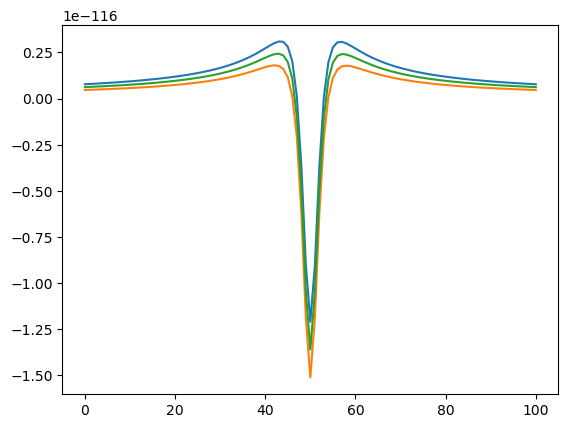

In [5]:
h11, h12, h22 = get_wave2(8, 10, 0.1,  100)
plt.show()
plt.plot(h11)
plt.plot(-h22)
plt.plot((h11 - h22)/2)

In [5]:
amp1 = []
amp2 = []
for i, z in zip(range(150), tqdm(range(150))):
    
    j = df.iloc[i].copy()
    
    a1, a2 = get_wave_amp(j['M']/2, j['M']/2, j['ri'], j['Qi'], Dl=0)
    
    amp1.append(a1)
    amp2.append(a2)

df['hpamp'] = amp1
df['hcamp'] = amp2
df

 99%|████████████████████████████████████████▋| 149/150 [00:21<00:00,  6.86it/s]


,Qi,ri,M,id,hpamp,hcamp
0,-8.0,1.0,1,0,2.451429e-14,2.130521e-14
1,-8.0,2.0,1,1,6.128573e-15,5.327107e-15
2,-8.0,3.0,1,2,2.723810e-15,2.367961e-15
3,-8.0,4.0,1,3,1.532143e-15,1.332179e-15
4,-8.0,5.0,1,4,9.805716e-16,8.527236e-16
...,...,...,...,...,...,...
145,-5.0,2.0,50,145,7.660661e-16,6.697145e-16
146,-5.0,3.0,50,146,3.404708e-16,2.985468e-16
147,-5.0,4.0,50,147,1.915124e-16,1.684370e-16
148,-5.0,5.0,50,148,1.225660e-16,1.081227e-16


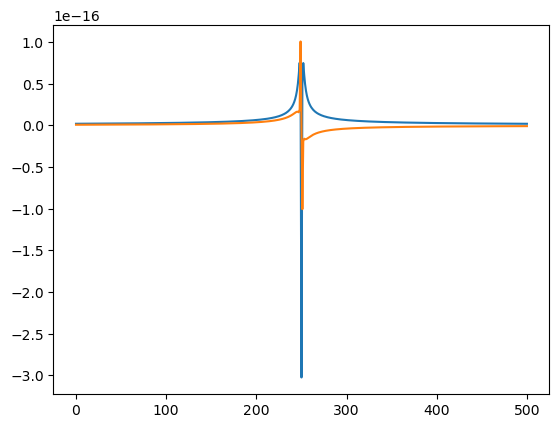

In [6]:
H11, H12, H22 = get_wave2(5, 50, 0.1, 0)

plt.plot(H11)
plt.plot(H12)
#plt.plot(H22)

In [25]:
times = [20, 50, 100, 200, 400, 700, 1000, 1500, 2000, 2500]

durs = np.ones(df.shape[0])*2501

for i in range(df.shape[0]):
    
    j = df.iloc[i]
    
    Ap = float(j['hpamp'])
    Ac = float(j['hcamp'])
    
    j = 0
    while j < len(times):
        
        hpt, hct = get_ht2(i, times[j], 0)
        
        if hpt < Ap/500 and hct < Ac/500:
            
            durs[i] = times[j]
            break
        
        j += 1
        
        
        
df['dur'] = durs       

df

In [44]:
df[(df['dur'] > 400) & (df['dur'] <= 700)]

,Qi,ri,M,id,hpamp,hcamp,dur
56,-7.0,5.0,10,56,9.805716e-15,8.527236e-15,700.0
96,-6.5,3.0,25,96,4.255953e-14,3.700383e-14,700.0
100,-6.0,1.0,25,100,3.830358e-14,3.330448e-14,700.0
130,-6.5,5.0,50,130,1.225715e-13,1.065609e-13,700.0


 99%|██████████████████████████████████████████▍| 71/72 [00:55<00:00,  1.29it/s]


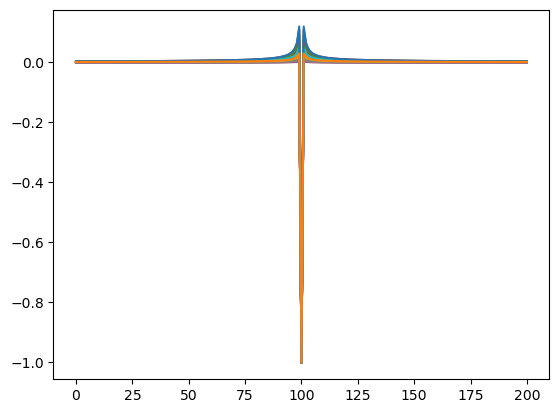

In [29]:
ids = list(dfc['id'])

for i, z in zip(ids, tqdm(range(len(ids)))):
    
    h11, h12, h22 = get_wave2(i, 20, 1/5, 0)
    
    hp = np.array(h11) - np.array(h22)
    
    hp /= max(abs(hp))
    
    if abs(hp[0]) > 0.1 or abs(hp[-1]) > 0.1:
        df.at[i, 'dur'] = 2501
        
    else:
    
        plt.plot(hp)

 99%|██████████████████████████████████████████▍| 71/72 [00:28<00:00,  2.46it/s]


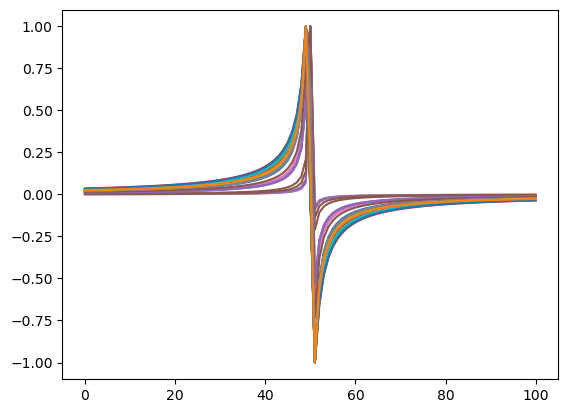

In [30]:
ids = list(dfc['id'])

for i, z in zip(ids, tqdm(range(len(ids)))):
    
    h11, h12, h22 = get_wave2(i, 20, 1/5, 0)
    
    hc = np.array(h12)
    hc /= max(abs(hc))
    
    if abs(hc[0]) > 0.1 or abs(hc[-1]) > 0.1:
        df.at[i, 'dur'] = 2501
        
    else:
    
        plt.plot(hc)

In [31]:
dfc = df[df['dur'] == 20]
dfc

,Qi,ri,M,id,hpamp,hcamp,dur
0,-8.0,1.0,1,0,2.451429e-14,2.130521e-14,20.0
1,-8.0,2.0,1,1,6.128573e-15,5.327107e-15,20.0
2,-8.0,3.0,1,2,2.723810e-15,2.367961e-15,20.0
6,-7.5,1.0,1,6,2.451429e-15,2.131217e-15,20.0
42,-8.0,3.0,10,42,2.723810e-12,2.366995e-12,20.0
43,-8.0,4.0,10,43,1.532143e-12,1.331455e-12,20.0
44,-8.0,5.0,10,44,9.805717e-13,8.521440e-13,20.0
45,-8.0,6.0,10,45,6.809525e-13,5.917756e-13,20.0
46,-7.5,1.0,10,46,2.451429e-12,2.130301e-12,20.0
47,-7.5,2.0,10,47,6.128573e-13,5.326007e-13,20.0


In [37]:
df.to_csv('lin.csv')

(array([32.,  7.,  3.,  6.,  4.,  4.,  3.,  4.,  1.]),
 array([  20.,   50.,  100.,  200.,  400.,  700., 1000., 1500., 2000.,
        2500.]),
 <BarContainer object of 9 artists>)

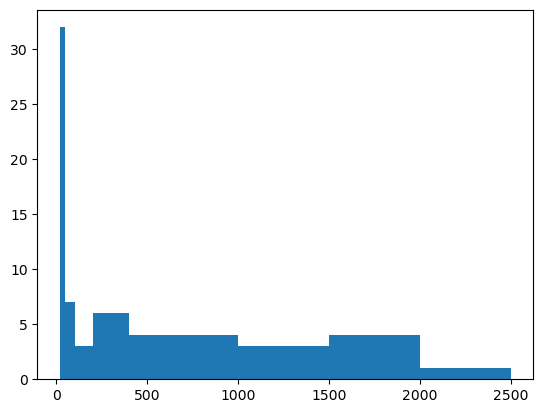

In [33]:
plt.hist(df['dur'], bins=times)

In [4]:
h11, h12, h22 = get_wave2(35, 50000000, 1000000, 100)

plt.plot(h11)

NameError: name 'Time' is not defined

In [57]:
df.iloc[28]

Qi      -6.000000e+00
ri       5.000000e+00
M        1.000000e+00
id       2.800000e+01
hpamp    9.794745e-20
hcamp    9.170767e-20
dur      2.501000e+03
Name: 28, dtype: float64

In [78]:
df[df['M'] == 1]

,Qi,ri,M,id,hpamp,hcamp,dur
0,-8.0,1.0,1,0,2.451429e-14,2.130521e-14,20.0
1,-8.0,2.0,1,1,6.128573e-15,5.327107e-15,20.0
2,-8.0,3.0,1,2,2.723810e-15,2.367961e-15,20.0
3,-8.0,4.0,1,3,1.532143e-15,1.332179e-15,50.0
4,-8.0,5.0,1,4,9.805716e-16,8.527236e-16,50.0
5,-8.0,6.0,1,5,6.809524e-16,5.922586e-16,100.0
6,-7.5,1.0,1,6,2.451429e-15,2.131217e-15,20.0
7,-7.5,2.0,1,7,6.128572e-16,5.330589e-16,100.0
8,-7.5,3.0,1,8,2.723809e-16,2.370282e-16,400.0
9,-7.5,4.0,1,9,1.532142e-16,1.333920e-16,1000.0
